In [0]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt


In [0]:
transform = transforms.Compose([transforms.RandomHorizontalFlip(0.5),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
                                ])


In [209]:

train_set = torchvision.datasets.CIFAR10(root='./',train=True,download=True,transform=transform)
test_set = torchvision.datasets.CIFAR10(root='./',train=False,download=True,transform=transform)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


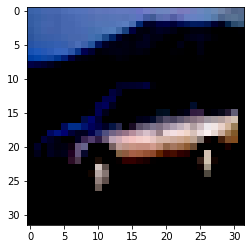

In [192]:
plt.imshow(np.transpose(train_set[4][0],[1,2,0]))

In [212]:
train_set.data.shape

(50000, 32, 32, 3)

In [0]:
train_set, val_set = torch.utils.data.random_split(train_set,[int(len(train_set)*0.1),int(len(train_set)*0.9)])

In [0]:
batch_size = 128 
epochs = 1000

train_loader=torch.utils.data.DataLoader(train_set,batch_size=batch_size,shuffle=True,drop_last=True)
val_loader =torch.utils.data.DataLoader(val_set,batch_size = batch_size,shuffle=True,drop_last = True)
test_loader =torch.utils.data.DataLoader(test_set,batch_size=batch_size,drop_last=True)

In [215]:
iter(train_loader).next()[0].shape # Check the shape of loaded data

torch.Size([128, 3, 32, 32])

In [0]:
class DNN(nn.Module):
    def __init__(self):
        super(DNN,self).__init__()
        self.layer = nn.Sequential(nn.Linear(32*32*3,1024),
                                   nn.ReLU(),
                                   nn.Linear(1024,256),
                                   nn.ReLU(),
                                   nn.Linear(256,10),)
        
    def forward(self,x):
        x = x.view(batch_size,-1)
        out = self.layer(x)
        return out

In [0]:
model = DNN()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),weight_decay=0.02)


In [218]:
loss_arr =[]
for i in range(epochs):
    correct = 0
    total = 0
    for j,[img,label] in enumerate(train_loader):
        x = img
        y = label

        optimizer.zero_grad()
        output = model.forward(x)
        _,output_index = torch.max(output,1)
        loss = loss_func(output,y)
        loss.backward()
        optimizer.step()
        total += y.size()[0]
        correct += (output_index == y).sum().float()
        loss_arr.append(loss)
    if i % (epochs/10) == 0 :
        
        with torch.no_grad():
            val_correct = 0
            val_total = 0
            for k,[val_img,val_label] in enumerate(val_loader):
                val_x = val_img
                val_y = val_label
                val_output = model.forward(val_x)
                _,val_output_index = torch.max(val_output,1)
                val_loss = loss_func(val_output,val_y)
                val_total += val_y.size()[0]
                val_correct += (val_output_index==val_y).sum().float()
        print('EPOCHS {:>3d}/{} || Train Loss : {:.4f} || Train Accuracy : {:.4f} || Validation Loss : {:.4f} || Validation Accuracy : {:.4f}'\
              .format(i+1,epochs,loss,100*correct/total,val_loss,100*val_correct/val_total))   


EPOCHS   1/1000 || Train Loss : 1.9312 || Train Accuracy : 29.6474 || Validation Loss : 1.7947 || Validation Accuracy : 34.2259
EPOCHS 101/1000 || Train Loss : 1.4442 || Train Accuracy : 49.4591 || Validation Loss : 1.6692 || Validation Accuracy : 42.1563
EPOCHS 201/1000 || Train Loss : 1.4607 || Train Accuracy : 51.7829 || Validation Loss : 1.6052 || Validation Accuracy : 42.3722
EPOCHS 301/1000 || Train Loss : 1.4057 || Train Accuracy : 54.2067 || Validation Loss : 1.4898 || Validation Accuracy : 43.2670
EPOCHS 401/1000 || Train Loss : 1.2567 || Train Accuracy : 53.2452 || Validation Loss : 1.5111 || Validation Accuracy : 43.9503
EPOCHS 501/1000 || Train Loss : 1.3362 || Train Accuracy : 54.5473 || Validation Loss : 1.4546 || Validation Accuracy : 44.0816
EPOCHS 601/1000 || Train Loss : 1.4006 || Train Accuracy : 54.1066 || Validation Loss : 1.6606 || Validation Accuracy : 43.5163
EPOCHS 701/1000 || Train Loss : 1.3824 || Train Accuracy : 54.3069 || Validation Loss : 1.4848 || Valida

In [220]:
correct = 0
total = 0
with torch.no_grad():
    for image,label in test_loader:
        x = image
        y = label

        output = model.forward(x)
        _,output_index = torch.max(output,1)
        total += label.size(0)
        correct += (output_index == y).sum().float()

    print('Accuracy of Testset : {:.4f}'.format(100*correct/total))

Accuracy of Testset : 44.3409
